# Алгоритмы классификации

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

В задании для оценивания качества работы алгоритмов требуется (самостоятельно) реализовать 10-тикратную перекрестную проверку (https://en.wikipedia.org/wiki/Cross-validation_(statistics)). В качестве ошибки используется средняя доля ошибок. Один раз (для kNN) в методических целях требуется дополнительно найти среднюю ошибку на обучающей части выборок перекрестной проверки. 

Разбиение на подвыборки должно быть одинаково для всех алгоритмов.

In [2]:
import numpy as np
import csv
import pylab as plt
%matplotlib inline


In [3]:
# Загрузите обучающую выборку (признаки и метки классов)

ifile = open("train.csv", "r")

train_data = []
train_values = []

read = csv.reader(ifile)
next(read)

for row in read:
    num = []
    for i in row[1:]:
        num.append(int(i))
    train_data.append(num)
    for i in row[0]:
        train_values.append(int(i))
ifile.close()
        

Для оптимального времени работы возьмем первые 1000 объектов из всей выборки. В *values* занесем метки, а в *data* 
занесем соответствующие признаки.


In [4]:
data = train_data[:1000]
values = train_values[:1000]


In [ ]:
# примените метод kNN
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# нарисовать графики зависимости ошибки перекрестной проверки на обучающей части и на тестовой части от k. 
# Сделать вывод об оптимальном k.
# (*) какие еще параметры влияют на результат классификации и как?


Применим метод K ближайших соседей и найдем оптимальное количество соседей, для которого ошибка является минимальной. Перебор произведем в пределах от 1 до 10 и построим график зависимости ошибки на обучающей и тестовой части от количества соседей. Воспользуемся **KNeighborsClassifier** из библиотеки **sklearn.neighbors** и проверим перекрестной проверкой на 10 частях.(9 обучаемых и 1 тестовая.) Используем **сross_validate** из **sklearn.model_selection** для получения значения ошибки как на тестовой,так и на обучающей части. 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate as cv

train_error = []
test_error = []

train_error.append(0)
test_error.append(0)

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cv(knn, data, values, cv=10, return_train_score=True)
    train_error.append(1 - np.array(scores['train_score']).mean())
    test_error.append(1 - np.array(scores['test_score']).mean())
    

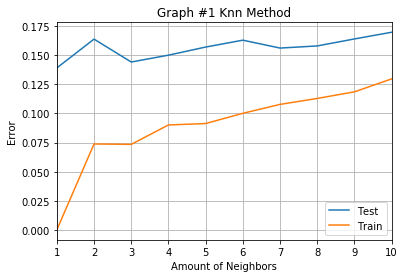

Минимальная ошибка на тестовой части = 0.144162016395 при k = 3
Минимальная ошибка на обучающей части = 0.0734474876125 при k = 3


In [8]:
plt.xlim([1, 10])
plt.title('Graph #1 Knn Method')
plt.plot(test_error, label='Test')
plt.plot(train_error, label='Train')
plt.ylabel('Error')
plt.xlabel('Amount of Neighbors')
plt.legend(loc=4, frameon=True)
plt.grid()
plt.show()

print("Минимальная ошибка на тестовой части =", min(test_error[2:]),"при k =", np.argmin(test_error[2:]) + 2)
print("Минимальная ошибка на обучающей части =", min(train_error[2:]),"при k =", np.argmin(train_error[2:]) + 2)



In [12]:
# примените метод SVM
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# нарисовать график зависимости ошибки перекрестной проверки на тестовой части от регуляризации C (log масштаб перебора по C). 
# Сделать вывод об оптимальном C.
# Что означают и как влияют параметры multi_class, fit_intercept, intercept_scaling, class_weight, random_state?
# Нарисуйте график зависимости числа опорных векторов как функцию от C

Для применения метода опорных векторов(SVM) воспользуемся **LinearSVC** из библиотеки **sklearn.svm**. Подберем оптимальное значение параметра **С**, перебирая степени 10-ки(от -10 до 10). Построим график и выберем оптимальное значение, на котором ошибка будет минимальной.

In [9]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score as cvs

means_1 = []

for c in range(-10,10):
    clf = LinearSVC(C=10**c)
    scores = cvs(clf, data, values, cv=10)
    means_1.append(1 - scores.mean())
    

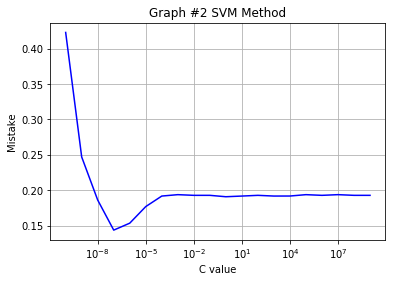

Минимальная ошибка = 0.143591525574 при значении С = 1e-07


In [10]:
x_val = [pow(10, i) for i in range(-10, 10)]
fig = plt.figure()
x = fig.add_subplot(1, 1, 1)
line = x.plot(x_val, means_1, color='blue')
x.set_xscale('log')
plt.title('Graph #2 SVM Method')
plt.ylabel('Mistake')
plt.xlabel('C value')
plt.grid()
plt.show()

print("Минимальная ошибка =", min(means_1), "при значении С =", x_val[means_1.index(min(means_1))])


Нарисуем зависимость числа опорных векторов, как функцию от **C**. Для этого воспользуемся функцией **n_support_**, которая возвращает необходимое количество опорных веторов для отделения i-ого класса от остальных. Сложим эти значения и получим общее количество опорных векторов.

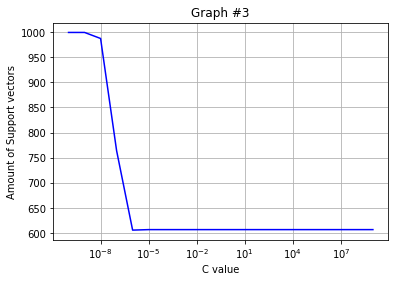

In [11]:
from sklearn.svm import SVC

res = []

for c in range(-10,10):
    lin_svm = SVC(kernel='linear', C=10**c).fit(data, values)
    res.append(sum(lin_svm.n_support_))

fig = plt.figure()
x_1 = fig.add_subplot(1, 1, 1)
line = x_1.plot(x_val, res, color='blue')
x_1.set_xscale('log')
plt.title('Graph #3')
plt.ylabel('Amount of Support vectors')
plt.xlabel('C value')
plt.grid()
plt.show()


С помощью параметра ***multi_class*** можно указать стратегию выполнения. По умолчанию стоит стратегия "Один против остальных"("ovr"),которая один класс объектов различает от остальных путем создания N классификаторов.Каждый классификатор отличает i-ый класс от остальных и вычисляет соответствующую функцию, будет выбран класс, классификатор которого выдал максимальное значение данной функции. Также можно выбрать стратегию "Один против одного"("crammer_singer"), в которой каждый классификатор присваивает объект одному из классов, класс выбирается путем "голосования", т.е. к какому классу больше всего кластеров отнесли объект, такой класс и будет выбран.

Параметр ***fit_intercept*** отвечает за использование перехвата в вычислениях. Принимает True, если данные не отцентрованы, и False иначе.

Параметр ***intercept_scaling*** отвечает за изменение перехвата. Используется, когда параметр fit_intercept установлен True. На вход принимает вещественное число.

Параметр ***class_weight*** устанавливает i-ому в словаре классу свой вес. По умолчанию - 1, т.е. веса всех классов одинаковы.

Параметр ***random_state*** - принимает значение для генерации случайных чисел. Используется при разделении выборки. По умолчанию - None.

In [ ]:
# примените метод DT
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Как влияют и что означают параметры max_depth, min_samples_split, min_samples_leaf, criteria на качество классификатора?
# Выбрать наилучшие значения параметров по вашим экспериментам

Применим метод **DT**, применив **DecisionTreeClassifier** из библиотеки **sklearn.tree** . Сначала посчитаем ошибку перекрестной проверкой без перебора параметров.

In [12]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_val_score as cvs

dtc = DTC()
scores_1 = cvs(dtc, data, values, cv=10)
print("Ошибка равна",1 - scores_1.mean())


Ошибка равна 0.371410991813


Параметр ***max_depth*** отвечает за глубину дерева. Возможные параметры: None(по умолчанию) - расширение дерева происходит до тех пор, пока все листья не будут построены, целое число - максимальная глубина дерева.

Параметр ***min_samples_split*** отвечает за минимальное количество выборок при делении узла. По умолчанию - 2. Также можно указать долю от общего количества выборок, указав вещественное число от 0 до 1. Тогда в качестве значения параметра будет вычесленно по формуле: (выбарнное число) * (общее количество)

Параметр ***min_samples_leaf*** отвечает за минимальное количество выборок на листьях при делении узла. По умолчанию - 1. Аналогично предыдущему методу можно взять часть от общего числа выборок, указав число от 0 до 1.

Параметр ***criterion*** отечает за меру расщипления. По умолчанию стоит "gini" - квадратичная функция расщипления, также возможен вариант "entropy" - логорифмическая функция расщипления.

Теперь переберем каждый параметр и найдем ту конфигурацию, на которой ошибка будет минимальной. Выведем эту конфигурацию и найденную ошибку.

In [13]:
from sklearn.model_selection import GridSearchCV

dtc = DTC()
param = {'max_depth':[i for i in range(1, 37, 10)], 'min_samples_split':[i for i in range(2, 38, 10)], 
        'min_samples_leaf':[i for i in range(1, 37, 10)], "criterion": ["gini", "entropy"]}
grid = GridSearchCV(estimator=dtc, param_grid=param, cv=10).fit(data, values)

print("Лучшие значения параметров:", grid.best_params_)


Лучшие значения параметров: {'criterion': 'entropy', 'min_samples_split': 2, 'max_depth': 21, 'min_samples_leaf': 1}


In [14]:
print("Лучшая ошибка =", 1 - grid.best_score_)


Лучшая ошибка = 0.337


In [ ]:
# примените метод NN
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# Как влияет параметр hidden_layer_sizes на качество классификации?
# Выбрать наилучшее значение параметра по вашим экспериментам


Применим метод NN, воспользовавшись **MLPClassifier** из библиотеки **sklearn.neural_network**. Сначала выведем ошибку на перекрестной проверке без перебора параметра ***hidden_layer_sizes***.

In [15]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import cross_val_score as csv

mlp = MLP()
scores_3 = csv(mlp, data, values, cv=10) 
print("Ошибка равна", 1 - scores_3.mean())


Ошибка равна 0.211381318758


Параметр ***hidden_layer_sizes*** отвечает за количество нейронов на i-ом скрытом уровне. По умолчанию 1 уровень, на котором 100 нейронов.

Подберем оптимальное количество нейронов на первом уровне, т.е. такое, на котором ошибка будет минимальной.


In [16]:
means_3 = [] 
x_values = []

for i in range(50, 501, 50):
    mlp = MLP(hidden_layer_sizes=(i,))
    scores_3 = csv(mlp, data, values, cv=10) 
    means_3.append(1 - scores_3.mean())
    x_values.append(i)
    

//anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


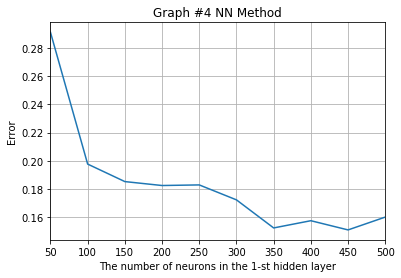

Минимальная ошибка = 0.150773209437 при 450 нейронах на первом уровне.


In [17]:
plt.xlim([50, 500])
plt.title('Graph #4 NN Method')
plt.plot(x_values, means_3)
plt.ylabel('Error')
plt.xlabel('The number of neurons in the 1-st hidden layer')
plt.grid()
plt.show()
print("Минимальная ошибка =", min(means_3), "при", 50 + 50*means_3.index(min(means_3)), "нейронах на первом уровне.")


Как можно видеть на графике, с увеличением числа нейронов ошибка при классификации уменьшается.


In [ ]:
# Сделайте вывод о наилучшем методе и его оптимальных параметрах


При подсчете ошибки на перекрестной проверке наилучшие результаты показали методы NN и SVM при подборе соответствующих оптимальных параметров.